## Dog Classification

### Introduction

&emsp;With the development of Computer Vision, classification is a general topic nowadays. The aim of this project is to compare the performance of several different models on dog breed classification. Dogs are one of the favorite pets for many people, but considering too many breeds of dogs, sometimes it is difficult for people to distinguish them. Therefore, I want to train a model to distinguish the breeds of dogs for us. For the dataset, I used the Stanford Dogs Dataset, which contains images of 120 breeds of dogs. I tried to use several different models for training in order to find a model with the best performance and analyze what factors would influence the performance of the trained model. The performance is evaluated by the plot of loss and accuracy on validation set and test set. <br>
&emsp;I used the local device, which only had 8G GPU memory. Due to the limitation of resources, models like VGG, which requires large GPU memory, are not been able to test. Also, because the limition of GPU memory, each experiment was been done in different ipynb file. Models that trained with multiple fully connected layers have "multi-fc" been added to the end of the file name. For example, "DogClassification-inception-0.000003.ipynb" is the experiment of Inception model with a learning rate of 0.000003 without deeper fully connected layers. "DogClassification-inception-0.00001-multi-fc.ipynb" is the experiment of Inception model with a learning rate of 0.00001 with deeper fully connected layers.

### Related work

&emsp;Dog classification is not a novel topic, so there are many previous work done by other people. Some sophisticated models have around 93% accuracy when doing the classification on this Stanford Dogs Dataset. For example, there is a model called µ2Net+ (ViT-L/16) provided by Andrea Gesmundo in Sep 2022, which had 93.5% accuracy on the image classification task with Stanford Dogs Dataset. This model also shows good performance of image classification on many other datasets.[1] <br>
&emsp;Instead of using such sophisticated models or trying to create such a complicated model, I tried to use simpler models and analyze the performance of models based on different parameters, like learning rate, etc..

### Methods

#### Model

&emsp;I chose three models in total, which including Inception v3, modilenet v2, and resent50. I used the pre-trained models, but I didn't freeze the parameters. Instead, I chose to retrain parameters for all layers. For the output layer, I modified the Fully-connected layers of each model to make the number of output features matches the number of dog breeds in the dataset. I tried two main ways. For the first way, I just change the output channel to the number of features in my dataset. For the second way, I tried to make it deeper by including a non-linear layer and dropout layer. Inception v3 is a CNN model for image analysis and object detection and it is developed from Googlenet. Below is a diagram of this model's structure.[2]

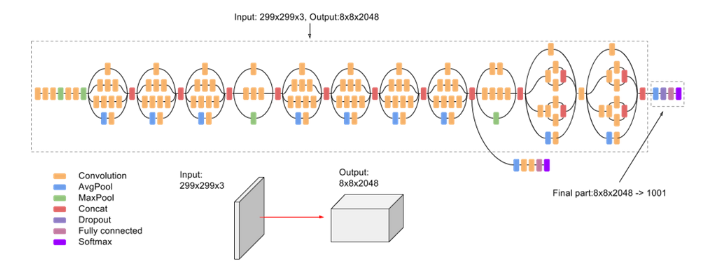

&emsp;Because the original model's output channel is 1000, I modified the final fully connected layer to make it output 120 channels to meet the number of breeds of the dataset. For this model, I tested it in the two ways I mentioned before. I run the training with only one fully connected layer and also run the training with deeper output layers that used two fully connected layers and a relu layer. <br>
&emsp;The second model I used is the Modilenet, which is based on an inverted residual structure as the example diagram shows below.[3]

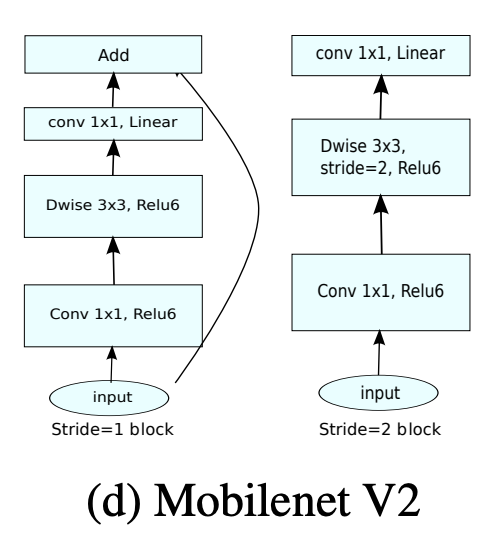

&emsp;Same as the Inception model, the output channel for the Original fully connected layer of Mobilenet is also 1000. I modified the final fully connected layer to make it output 120 channels as well. Because the input channel of the original fully connected layer is 1280 which is not too large, I didn't add an extra relu layer or linear layer and just directly set the output channel as 120 for the last fully connected layer. Finally, the last model I used is resent50. Below is the diagram of the architecture of it.[4]

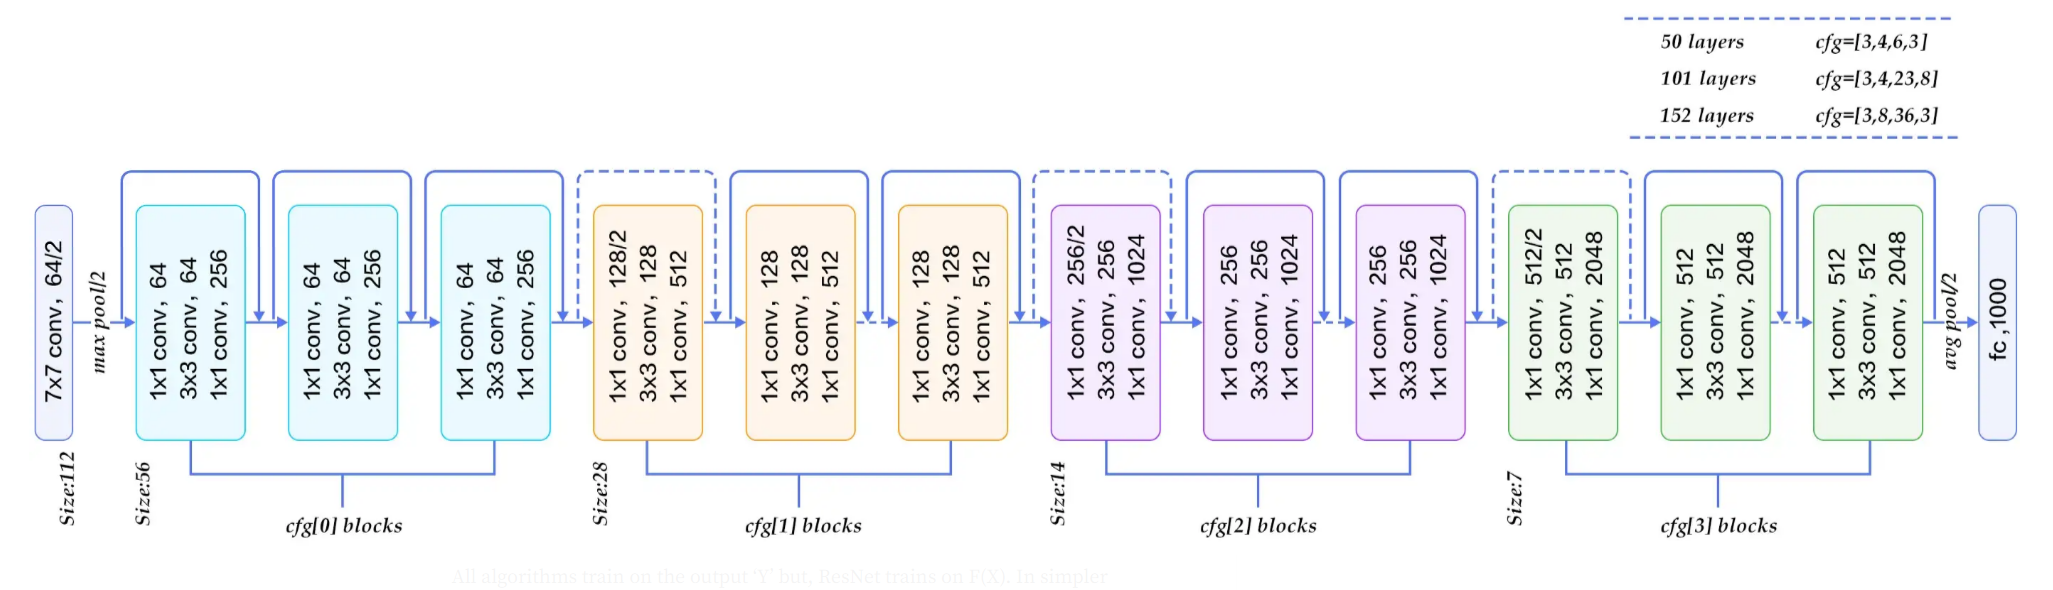

&emsp;I did the same modification with the output layer to change the output channel from the original 1000 to 120. For this resnet50 model, I tested it in the same way as the Inception model. I run the training with only one fully connected layer and also run the training with deeper output layers that used two fully connected layers and a relu layer.<br>
&emsp;During training, I use CrossEntropyLoss as my loss function and Adam as my optimizer. I used the softmax function as the activation function in the output layer for prediction.

### Experiments

#### Data

&emsp;The dataset I used is Stanford Dogs Dataset. It contains 120 dog breeds. Each class has approximately 150 images and there are 20580 images in this dataset in total. I split the dataset into train set, validation set, and test set to the ratio of 8:1:1. For the label of images, I marked 120 breeds with a number from 0 to 119. There is the link to this dataset: http://vision.stanford.edu/aditya86/ImageNetDogs/. [5] I only used the images file, instead of other files like annotations, lists, and train/test features.<br>
&emsp;Because images in the dataset are in different sizes, in the data transform, I resize all images into 299x299. I also used a random horizontal flip and calculate the mean and std to do the normalization to augment the training set. <br>
&emsp;Some images in the dataset not only contain the dog, but also include other objects or people in the image. I was trying to do the preprocessing by only cropping the dog images from the original images and using cropped images for training. I used cv2.CascadeClassifier to extract dog faces from images. A Cascade classifier is a model that is trained using positive images and negative images to detect the view of the face or body of an object. I used a trained cascade classifier for dog face detection, but the result is not satisfied. I tried many trained cascade classifier models, but none of them had good output. The cascade classifier model that provided the best cropping result is downloaded from this GitHub repo: https://github.com/kskd1804/dog_face_haar_cascade. It is shown below. The first one is the original image, the second one shows the extracted face area.

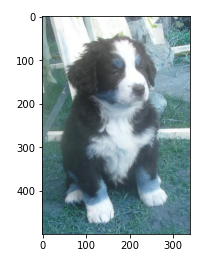

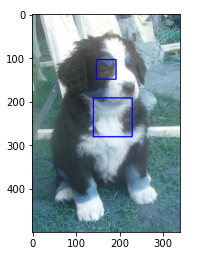

&emsp;From the example images, we can see that the cropped region is not exactly the face area of the dog. Because the cropping result didn't meet my expectations, I finally had to give up the cropping process. In order to avoid duplicated work, I only contained code for example cropping in DogClassification-inception-0.000005-multi-fc.ipynb.

#### Metrics

&emsp;I evaluated the performance of each model by their loss and accuracy for validation set and test set. In addition, I trained the model with different learning rates in order to find the best learning rate the produce the best training result. The parameters for the epoch with the best loss value will be saved and tested with the test set as well.

#### Empirical Study

&emsp;For all three models, with the experiments, I found that to train the pre-trained model without freezing any parameters, the learning rate need to be lower. If using a learning rate of 0.0001, the training result is not good. The loss will decrease for the first few epochs and constantly increase. The accuracy was also low. Therefore, I tried to use a lower learning rate to make the training converging slowlier while increasing the accuracy. I mainly tested models with 0.00001, 0.000005, and 0.000003. For all training, I used an epoch number of 50 and batch size of 32.<br>
&emsp;Among the three models, the Inception model and resnet50 model had generally better performance compared to the Mobilenet. Below are tables that contain all training results and plots for each model.

#### Inception

| Experiment | Deeper fc layer | Learning rate | Best epoch | Loss (last epoch) | Accuracy (last epoch) | Loss (best epoch) | Accuracy (best epoch) | 
| --- | --- | --- | --- | --- | --- | --- | --- |
| 1 | No | 0.00001 | 19 | 0.02137 | 0.84028 | 0.02137 | 0.83981 |
| 2 | No | 0.000005 | 25 | 0.02107 | 0.82938 | 0.02107 | 0.82464 |
| 3 | No | 0.000003 | 46 | 0.01870 | 0.82796 | 0.01870 | 0.82796 |
| 4 | Yes | 0.00001 | 16 | 0.02552 | 0.82843 | 0.02552 | 0.82701 |
| 5 | Yes | 0.000005 | 32 | 0.02164 | 0.82037 | 0.02164 | 0.81943 |

##### accuracy plot and loss plot for experiment 1

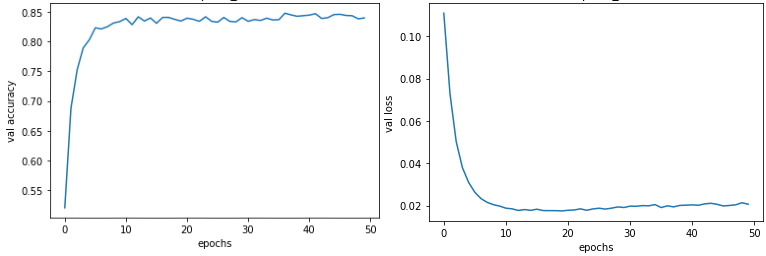

##### accuracy plot and loss plot for experiment 2

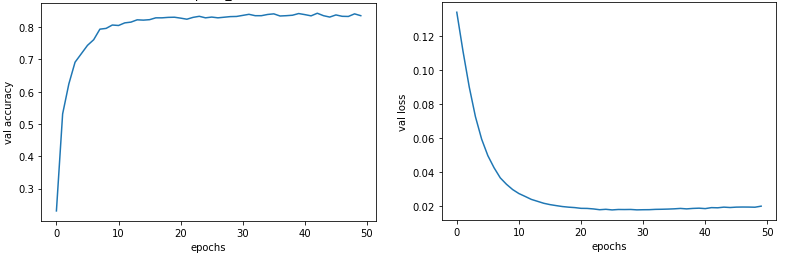

##### accuracy plot and loss plot for experiment 3

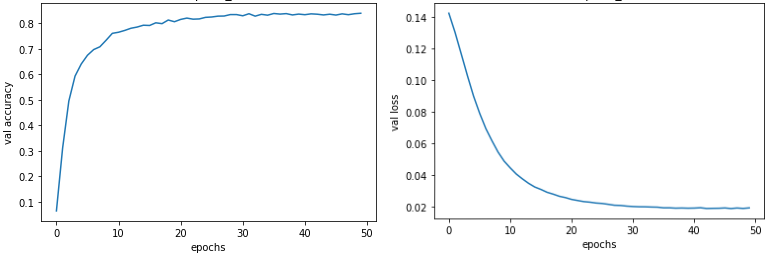

##### accuracy plot and loss plot for experiment 4

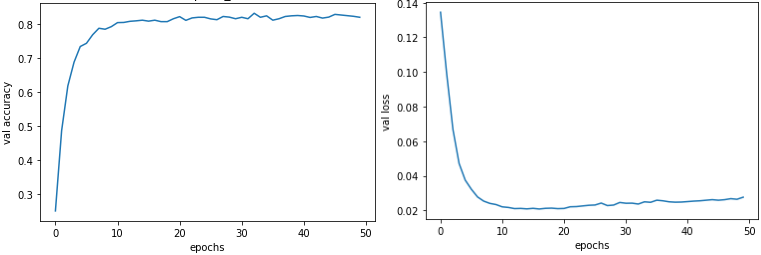

##### accuracy plot and loss plot for experiment 5

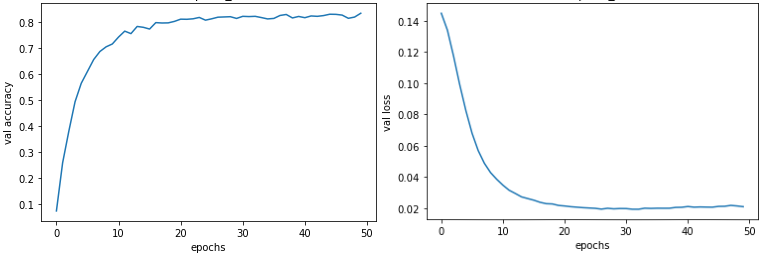

#### Mobilenet

| Experiment | Deeper fc layer | Learning rate | Best epoch | Loss (last epoch) | Accuracy (last epoch) | Loss (best epoch) | Accuracy (best epoch) | 
| --- | --- | --- | --- | --- | --- | --- | --- |
| 1 | No | 0.00001 | 37 | 0.02336 | 0.77061 | 0.02336 | 0.77061 |
| 2 | No | 0.000005 | 49 | 0.02250 | 0.79905 | 0.02250 | 0.79905 |
| 3 | No | 0.000003 | 49 | 0.02876 | 0.76398 | 0.02876 | 0.76398 |

##### accuracy plot and loss plot for experiment 1

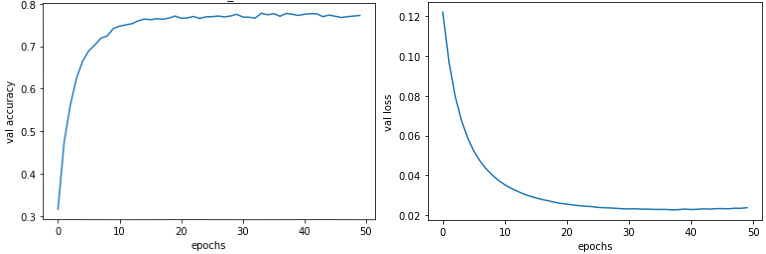

##### accuracy plot and loss plot for experiment 2

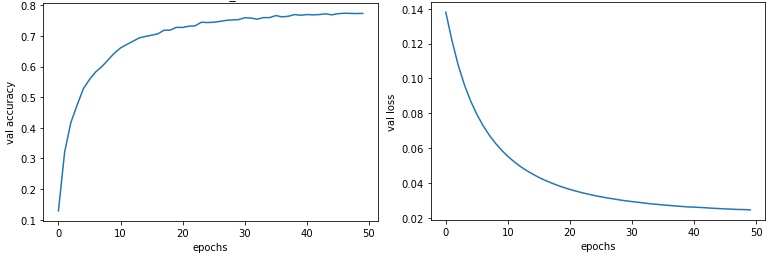

##### accuracy plot and loss plot for experiment 3

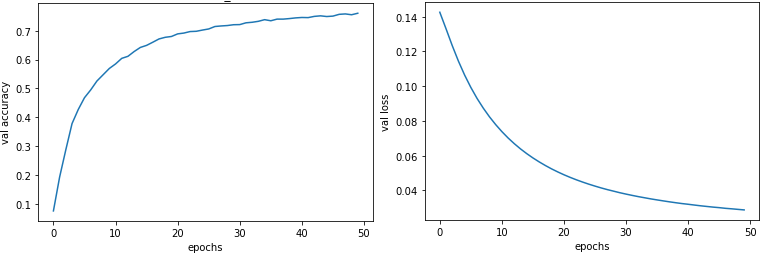

#### resnet50

| Experiment | Deeper fc layer | Learning rate | Best epoch | Loss (last epoch) | Accuracy (last epoch) | Loss (best epoch) | Accuracy (best epoch) | 
| --- | --- | --- | --- | --- | --- | --- | --- |
| 1 | No | 0.00001 | 13 | 0.02233 | 0.83175 | 0.02233 | 0.83175 |
| 2 | No | 0.000005 | 29 | 0.02077 | 0.82938 | 0.02077 | 0.82938 |
| 3 | Yes | 0.00001 | 10 | 0.02397 | 0.02397 | 0.02397 | 0.82464 |
| 4 | Yes | 0.000005 | 20 | 0.02066 | 0.83507 | 0.02066 | 0.83507 |

##### accuracy plot and loss plot for experiment 1

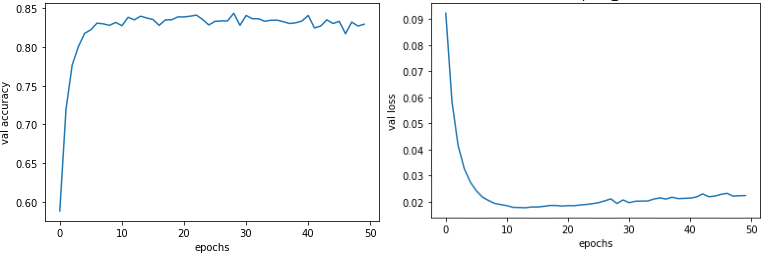

##### accuracy plot and loss plot for experiment 2

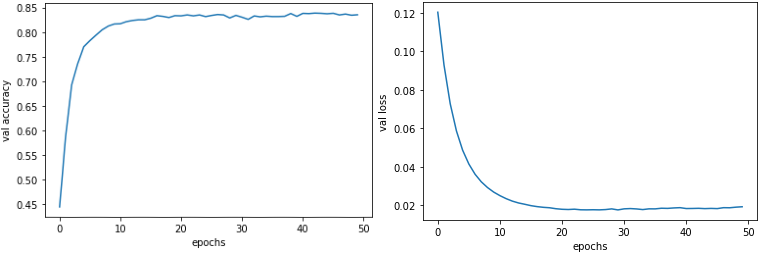

##### accuracy plot and loss plot for experiment 3

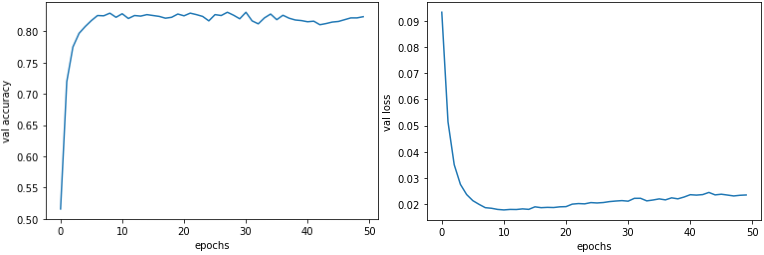

##### accuracy plot and loss plot for experiment 4

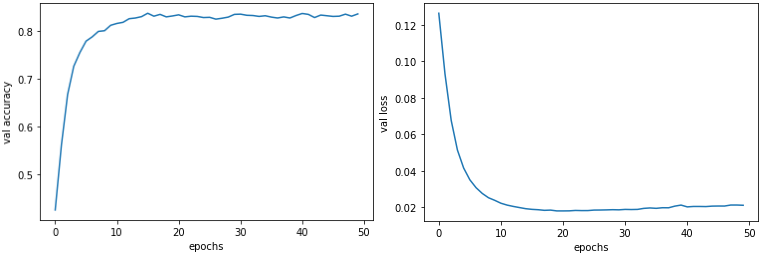

#### Comparisons

&emsp;From the above plots, we could see that the performance of the Inception model and the resnet50 model is better than the Modilenet, where the accuracy of both the Inception model and the resnet50 model is higher than 80% but the Modilenet's accuracy is lower than 80%. In addition, for the Inception model, just training model with a single output layer provided better results compared to training model with adding a deeper fully connected layer. However, for the resnet50 model, training model by adding a deeper fully connected layer would provide higher accuracy. Furthermore, for the Inception model and resnet50 model, the loss plot for the learning rate of 0.000005 had a smoother and better curve compared to the learning rate of 0.00001 and 0.000003. For the Modilenet model, using a learning rate of 0.00001 would generate a better loss plot.<br>
&emsp;All in all, based on the accuracy of all experiments, the best accuracy of prediction on the Stanford Dog Dataset is approximately 84%, which is achieved by the Inception model and resnet50 model. For the future experiment, adding a transformer or doing preprocessing on input images with cropping may help on enhancing the performance and accuracy of both models.

### Conclusion

&emsp;This project mainly analyzed two aspects of three models: The inception model, the Mobilenet model, and the resnet50 model. The first is to study the performance of the trained model based on the different learning rates. According to the plot of loss on the validation set during the training and the final accuracy, we could decide which learning rate is better for the model. The second thing is to study how the structure of the output layer would influence the performance of the model. Considering the result of the training models, different models may have different most suitable output layers. For example, both the original Inception model and the original resnet50 model only have one fully connected layer as the output layer and the input channels are both 2048 and the output channels are both 1000, but the Inception model performs better with the original one fully connected layer and the resnet50 model performs better with deeper fully connected layers. Overall, the best accuracy of the prediction on dog classification is approximately 84%, which is an acceptable result. With more preprocessing or other methods, a higher accuracy should be expected for future experiments.

### Reference

[1] Gesmundo, Andrea. "A Continual Development Methodology for Large-scale Multitask Dynamic ML Systems." arXiv preprint arXiv:2209.07326 (2022).<br>
[2]T, Adith Narein. “Inception V3 Model Architecture.” OpenGenus IQ: Computing Expertise &amp; Legacy. OpenGenus IQ: Computing Expertise &amp; Legacy, October 8, 2021. https://iq.opengenus.org/inception-v3-model-architecture/. <br>
[3]Sandler, Mark, Andrew Howard, Menglong Zhu, Andrey Zhmoginov, and Liang-Chieh Chen. "Mobilenetv2: Inverted residuals and linear bottlenecks." In Proceedings of the IEEE conference on computer vision and pattern recognition, pp. 4510-4520. 2018.<br>
[4]Rastogi, Aditi. “RESNET50.” Medium. Dev Genius, March 14, 2022. https://blog.devgenius.io/resnet50-6b42934db431. <br>
[5]Stanford dogs dataset for fine-grained visual categorization. Accessed December 9, 2022. http://vision.stanford.edu/aditya86/ImageNetDogs/. 